# 範例 : 計程車費率預測
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

# [作業目標]
- 試著模仿範例寫法, 使用程車費率預測競賽練習時間欄位處理

# [作業重點]
- 新增星期幾(day of week)與第幾周(week of year)這兩項特徵, 觀察有什麼影響 (In[4], Out[4], In[5], Out[5])
- 新增加上年週期與周周期特徵 , 觀察有什麼影響 (In[8], Out[8], In[9], Out[9]) 

In [35]:
# 做完特徵工程前的所有準備
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

data_path = 'data/'
df = pd.read_csv(data_path + 'taxi_data1.csv')

train_Y = df['fare_amount']
df = df.drop(['fare_amount'] , axis=1)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-10-21 23:54:10 UTC,-73.990580,40.761071,-73.981128,40.758634,2
1,2015-02-03 10:42:03 UTC,-73.988403,40.723431,-73.989647,40.741695,1
2,2014-03-16 18:58:58 UTC,-74.015785,40.715110,-74.012029,40.707888,2
3,2009-06-13 16:10:54 UTC,-73.977322,40.787275,-73.958030,40.778838,3
4,2014-06-12 03:25:56 UTC,-73.989683,40.729717,-73.982490,40.761887,3


In [36]:
# 時間特徵分解方式:使用datetime
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%Y')).astype('int64')
df['pickup_month'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%m')).astype('int64')
df['pickup_day'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%d')).astype('int64')
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%H')).astype('int64')
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%M')).astype('int64')
df['pickup_second'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strftime(x, '%S')).astype('int64')
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


### 使用  pd.Series.dt 內建函數會更快

In [37]:
# df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S UTC'))
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_minute'] = df['pickup_datetime'].dt.minute
df['pickup_second'] = df['pickup_datetime'].dt.second
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56


In [45]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
scaler = MinMaxScaler()
train_X = scaler.fit_transform(df_temp)
Linear = LinearRegression()
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
GDBT = GradientBoostingRegressor(n_estimators=100)
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.026080352293789844
Gradient Boosting Reg Score : 0.7164508096324071


# 作業1
* 對照範例，試著加入星期幾 (day of week) 與第幾周 (week of year) 這兩項特徵，  
看看結果會比原本只有時間特徵分解的結果更好或更差?

In [39]:
# 加入星期幾與第幾周兩個特徵
"""
Your Code Here
"""
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_week'] = df['pickup_datetime'].dt.week
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_weekday,pickup_week
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,4,42
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,1,6
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,6,11
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,5,24
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,3,24


In [40]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.026481023863712937
Gradient Boosting Reg Score : 0.7103516600544858


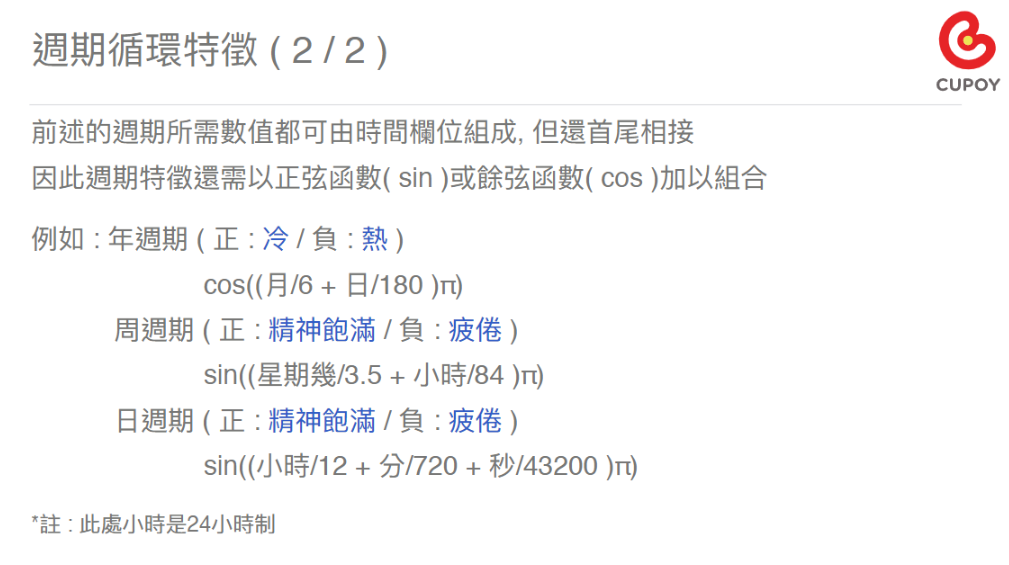

In [41]:
from IPython.display import Image
Image('./img/時間週期性特徵.png')

In [42]:
# 加上"日週期"特徵 (參考講義"週期循環特徵")
import math
df['day_cycle'] = df['pickup_hour']/12 + df['pickup_minute']/720 + df['pickup_second']/43200
df['day_cycle'] = df['day_cycle'].map(lambda x:math.sin(x*math.pi))
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_weekday,pickup_week,day_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,4,42,-0.025450
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,1,6,0.333601
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,6,11,-0.967083
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,5,24,-0.888817
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,3,24,0.782427


In [28]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.026080352293789844
Gradient Boosting Reg Score : 0.7157917499833496


### 加入日週期後效果變好

# 作業2
* 對照範例的日週期效果，試著參考投影片完成年週期與周週期的特徵 (也可以用你自己想到的方式)，  
看看結果會比範例中的結果更好或更差?

In [33]:
# 加上"年週期"與"周週期"特徵
"""
Your Code Here
"""

df['week_cycle'] = df['pickup_weekday'] / 3.5 + df['pickup_hour'] / 84
df['week_cycle'] = df['week_cycle'].apply(lambda x: math.sin( x * math.pi))
df['year_cycle'] = df['pickup_month'] / 6 + df['pickup_day'] / 180
df['year_cycle'] = df['year_cycle'].apply(lambda x: math.sin( x * math.pi))
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,pickup_weekday,pickup_week,day_cycle,week_cycle,year_cycle
0,2011-10-21 23:54:10,-73.990580,40.761071,-73.981128,40.758634,2,2011,10,21,23,54,10,4,42,-0.025450,-0.965926,-0.629320
1,2015-02-03 10:42:03,-73.988403,40.723431,-73.989647,40.741695,1,2015,2,3,10,42,3,1,6,0.333601,0.955573,0.891007
2,2014-03-16 18:58:58,-74.015785,40.715110,-74.012029,40.707888,2,2014,3,16,18,58,58,6,11,-0.967083,-0.222521,0.961262
3,2009-06-13 16:10:54,-73.977322,40.787275,-73.958030,40.778838,3,2009,6,13,16,10,54,5,24,-0.888817,-0.930874,-0.224951
4,2014-06-12 03:25:56,-73.989683,40.729717,-73.982490,40.761887,3,2014,6,12,3,25,56,3,24,0.782427,0.330279,-0.207912


In [34]:
# 將結果使用線性迴歸 / 梯度提升樹分別看結果
df_temp = df.drop(['pickup_datetime'] , axis=1)
train_X = scaler.fit_transform(df_temp)
print(f'Linear Reg Score : {cross_val_score(Linear, train_X, train_Y, cv=5).mean()}')
print(f'Gradient Boosting Reg Score : {cross_val_score(GDBT, train_X, train_Y, cv=5).mean()}')

Linear Reg Score : 0.025513945312874476
Gradient Boosting Reg Score : 0.7139655570386567


### 加入周週期和年週期後，效果變差